<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=120087823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Feb-23


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
total 212
-rw-r--r-- 1 nobody nogroup 214204 Feb 23 14:43 'Shark Tank US dataset.csv'

There are 998 rows and 52 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

  Original Air Date              Startup Name           Industry  \
0               NaN            AvaTheElephant    Health/Wellness   
1               NaN        Mr.Tod'sPieFactory  Food and Beverage   
2               NaN                   Wispots  Business Services   
3               NaN  CollegeFoxesPackingBoxes     Lifestyle/Home   
4               NaN                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0            NaN              50000.0   
1                     0.0            NaN             460000.0   
2                     0.0            NaN            1200000.0   
3                     0.0            NaN             250000.0   
4                     0.0            NaN            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0         1            50000.0   
1                     10.0            4600000.0         1           460000.0   
2                     10.0           12000000.0         0                NaN   
3                     25.0            1000000.0         0                NaN   
4                     15.0            6666667.0         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  ...  \
0               55.0         90909.0                       1.0  ...   
1               50.0        920000.0                       2.0  ...   
2                NaN             NaN                       NaN  ...   
3                NaN             NaN                       NaN  ...   
4                NaN             NaN                       NaN  ...   

   Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
0           NaN   NaN                             50000.0   
1           NaN   NaN                            230000.0   
2           NaN   NaN                                 NaN   
3           NaN   NaN                                 NaN   
4           NaN   NaN                                 NaN   

   Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
0                                55.0                           NaN   
1                                25.0                           NaN   
2                                 NaN                           NaN   
3                   

In [6]:
shark_tank.tail(10).T

988                989  \
Season Number                                       11                 11   
Season Start                                 29-Sep-19          29-Sep-19   
Season End                                   15-May-20          15-May-20   
Episode Number                                      24                 24   
Pitch Number                                       989                990   
Original Air Date                            15-May-20          15-May-20   
Startup Name                             DreamlandBaby       RollinGreens   
Industry                            Children/Education  Food and Beverage   
Business Description                 Dreamland Baby -     RollinGreens -    
Pitchers Gender                                 Female         Mixed Team   
Pitchers City                                      NaN                NaN   
Pitchers State                                     NaN                NaN   
Pitchers Average Age                               NaN                NaN   
Entrepreneur Names                                 NaN                NaN   
Company Website                                    NaN                NaN   
Multiple Entrepreneurs                             NaN                NaN   
US Viewership                                     4.55               4.55   
Original Ask Amount                           100000.0           500000.0   
Original Offered Equity                           10.0               10.0   
Valuation Requested                          1000000.0          5000000.0   
Got Deal                                             1                  1   
Total Deal Amount                             100000.0           500000.0   
Total Deal Equity                                 22.5               20.0   
Deal Valuation                                444444.0          2500000.0   
Number of sharks in deal                           1.0                1.0   
Investment Amount Per Shark                   100000.0           500000.0   
Equity Per Shark                                  22.5               20.0   
Royalty Deal                                       NaN                NaN   
Loan                                               NaN                NaN   
Barbara Corcoran Investment Amount                 NaN                NaN   
Barbara Corcoran Investment Equity                 NaN                NaN   
Mark Cuban Investment Amount                       NaN                NaN   
Mark Cuban Investment Equity                       NaN                NaN   
Lori Greiner Investment Amount                100000.0                NaN   
Lori Greiner Investment Equity                    22.5                NaN   
Robert Herjavec Investment Amount                  NaN           500000.0   
Robert Herjavec Investment Equity                  NaN               20.0   
Daymond John Investment Amount                     NaN                NaN   
Daymond John Investment Equity                     NaN                NaN   
Kevin O Leary Investment Amount                    NaN                NaN   
Kevin O Leary Investment Equity                    NaN                NaN   
Guest Investment Amount                            NaN                NaN   
Guest Investment Equity                            NaN                NaN   
Barbara Corcoran Present                           NaN                NaN   
Mark Cuban Present                                 NaN                NaN   
Lori Greiner Present                               NaN                NaN   
Robert Herjavec Present                            NaN                NaN   
Daymond John Present                               NaN                NaN   
Kevin O Leary Present                              NaN                NaN   
Kevin Harrington Present                           NaN                NaN   
Guest Name                                         NaN                NaN   
Notes                                          

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number Season Start Season End  Episode Number  Pitch Number  \
955             11    29-Sep-19  15-May-20              16           956   
502              7    25-Sep-15  20-May-16               2           503   
758              9    01-Oct-17  25-Feb-18              13           759   
516              7    25-Sep-15  20-May-16               6           517   
219              4    14-Sep-12  17-May-13              16           220   
941             11    29-Sep-19  15-May-20              12           942   
866             10    07-Oct-18  12-May-19              16           867   
601              7    25-Sep-15  20-May-16              27           602   
915             11    29-Sep-19  15-May-20               6           916   
466              6    26-Sep-14  15-May-15              22           467   

    Original Air Date          Startup Name            Industry  \
955               NaN                Bohana   Food and Beverage   
502               NaN              Loliware   Food and Beverage   
758               NaN  ModernChristmasTrees      Lifestyle/Home   
516               NaN               Hotshot   Food and Beverage   
219               NaN         TheSmartWheel          Automotive   
941               NaN       Ready,Set,Food!  Children/Education   
866               NaN             WildEarth        Pet Products   
601               NaN    YourselfExpression      Fashion/Beauty   
915               NaN                EZCPak     Health/Wellness   
466               NaN                  Naja      Fashion/Beauty   

                                  Business Description Pitchers Gender  \
955                                          Bohana -           Female   
502                                        Loliware -           Female   
758  Modern Christmas Trees - artificial tree that ...            Male   
516                                         Hotshot -             Male   
219                       The Smart Wheel - Automotive      Mixed Team   
941                               Ready, Set, Food! -       Mixed Team   
866                            Wild Earth - dog treats            Male   
601                             Yourself Expression -       Mixed Team   
915                                         EZC Pak -             Male   
466                             Naja - Women's Apparel          Female   

     Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
955            NaN            NaN                  NaN                NaN   
502            NaN            NaN                  NaN                NaN   
758            NaN             CO                  NaN                NaN   
516            NaN            NaN                  NaN                NaN   
219    Londonderry             NJ                  NaN  The Inventioneers   
941            NaN            NaN                  NaN                NaN   
866            NaN            NaN                  NaN                NaN   
601            NaN             FL                  NaN                NaN   
915            NaN            NaN                  NaN                NaN   
466  San Francisco             CA                  NaN    Catalina Girald   

              Company Website  Multiple Entrepreneurs  US Viewership  \
955                       NaN                    <NA>            NaN   
502                       NaN                    <NA>            NaN   
758                       NaN                    <NA>            NaN   
516                       NaN                    <NA>            NaN   
219  http://smartwheelusa.com                       0            NaN   
941                       NaN                    <NA>            NaN   
866                       NaN                    <NA>            NaN   
601                       NaN                    <NA>            NaN   
915                       NaN                    <NA>            NaN   
466        http://www.naja.co                  

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       998 non-null    Int32  
 1   Season Start                        998 non-null    object 
 2   Season End                          998 non-null    object 
 3   Episode Number                      998 non-null    Int32  
 4   Pitch Number                        998 non-null    Int32  
 5   Original Air Date                   51 non-null     object 
 6   Startup Name                        998 non-null    object 
 7   Industry                            998 non-null    object 
 8   Business Description                998 non-null    object 
 9   Pitchers Gender                     997 non-null    object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non-n

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 13
Number of unique values in Season Start - 13
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 998
Number of unique values in Original Air Date - 13
Number of unique values in Startup Name - 996
Number of unique values in Industry - 15
Number of unique values in Business Description - 996
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 250
Number of unique values in Pitchers State - 51
Number of unique values in Pitchers Average Age - 3
Number of unique values in Entrepreneur Names - 429
Number of unique values in Company Website - 436
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 12
Number of unique values in Original Ask Amount - 72
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 159
Number of unique values in 

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

998 startup companies came for pitching 



In [13]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [14]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=600)
fig.update_yaxes(title_text="")
fig.show()

Food and Beverage          202
Fashion/Beauty             178
Lifestyle/Home             162
Children/Education         103
Fitness/Sports/Outdoors    101
Software/Tech               63
Health/Wellness             48
Pet Products                43
Business Services           31
Media/Entertainment         23
Automotive                  12
Green/CleanTech             11
Travel                      11
Uncertain/Other              9
nan                          1
Name: Industry, dtype: int64


Male          586
Female        245
Mixed Team    166
Name: Pitchers Gender, dtype: int64



<AxesSubplot:ylabel='Pitchers Gender'>

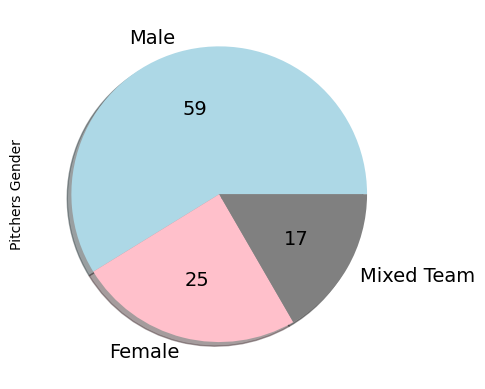

In [15]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts())
print()
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 57% companies received offers and 43% startups could not convince Sharks to invest

1    567
0    431
Name: Got Deal, dtype: int64 

1    57%
0    43%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

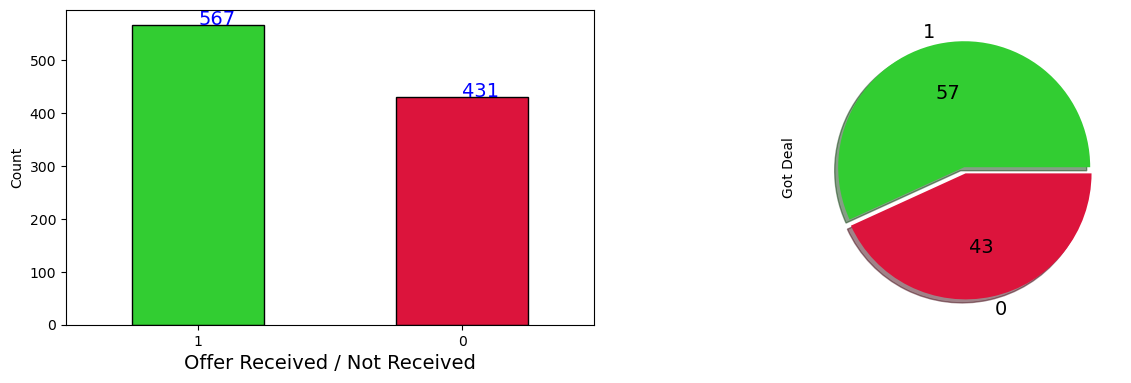

In [16]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 564 companies received offers & 431 startups could not convince #Sharks to invest.

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [17]:
IFrame("https://public.tableau.com/app/profile/satya.thirumani/viz/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [18]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [19]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [20]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $281,257,000


In [21]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $164,954,666


In [22]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest Investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                         5000000.0
MokiDoorstep                   3000000.0
SynDaverLabs                   3000000.0
Zipz                           2500000.0
Fizzics                        2000000.0
TenThirtyOneHauntedHayrides    2000000.0
Vengo                          2000000.0
RuggedManiac                   1750000.0
BeyondSushi                    1500000.0
Sworkit                        1500000.0
XCraft                         1500000.0
Trunkster                      1400000.0
HyConn                         1250000.0
Jackson'sHonest                1250000.0
TheRedDressBoutique            1200000.0
Name: Total Deal Amount, dtype: float64


In [23]:
# Top 15 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
Name: Total Deal Equity, dtype: float64


In [24]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].sum(),"\n")

shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 37.0 



Season Number                Startup Name  Original Ask Amount  \
272              5            RapidRamenCooker             300000.0   
289              5  BetterLifeCleaningProducts             400000.0   
291              5          PaparazziProposals             250000.0   
299              5  Grace&LaceKnittedBootSocks             175000.0   
300              5    YuboCustomizedLunchBoxes             150000.0   
433              6       Scratch&GrainBakingCo             150000.0   
459              6                    CocoJack             125000.0   
520              7               SavvyNaturals             200000.0   
563              7                     Sworkit            1500000.0   
571              7                  BetterBack             750000.0   
580              7                       Vengo            2000000.0   
586              7                     Coolbox             500000.0   
621              8                      TekDry             500000.0   
622              8              NightRunner270             250000.0   
636              8                   StyleClub             500000.0   
640              8   Jack'sStands&Marketplaces              50000.0   
642              8                        Toor             500000.0   
647              8                     Inboard             750000.0   
651              8               SealedbySanta             150000.0   
670              8               Dbestproducts             350000.0   
684              8        BlentiqueWineCompany             250000.0   
686              8                    Rareform             300000.0   
703              8                 Wine&Design             500000.0   
733              9                    WaiveCar             500000.0   
753              9                  EverlyWell            1000000.0   
754              9                        Mush             300000.0   
759              9                     Frywall             100000.0   
764              9                     Stasher             400000.0   
791              9                GunnarOptiks             750000.0   
845             10            MakeupJunkieBags             200000.0   
899             11                 BoostOxygen            1000000.0   
924             11                       Outer             750000.0   
931             11                  Flexscreen             800000.0   
955             11                      Bohana             200000.0   
956             11              BohoCamperVans             300000.0   
959             11                       Goumi            1000000.0   
974             11                MuralPainter             300000.0   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                NaN                NaN  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0        

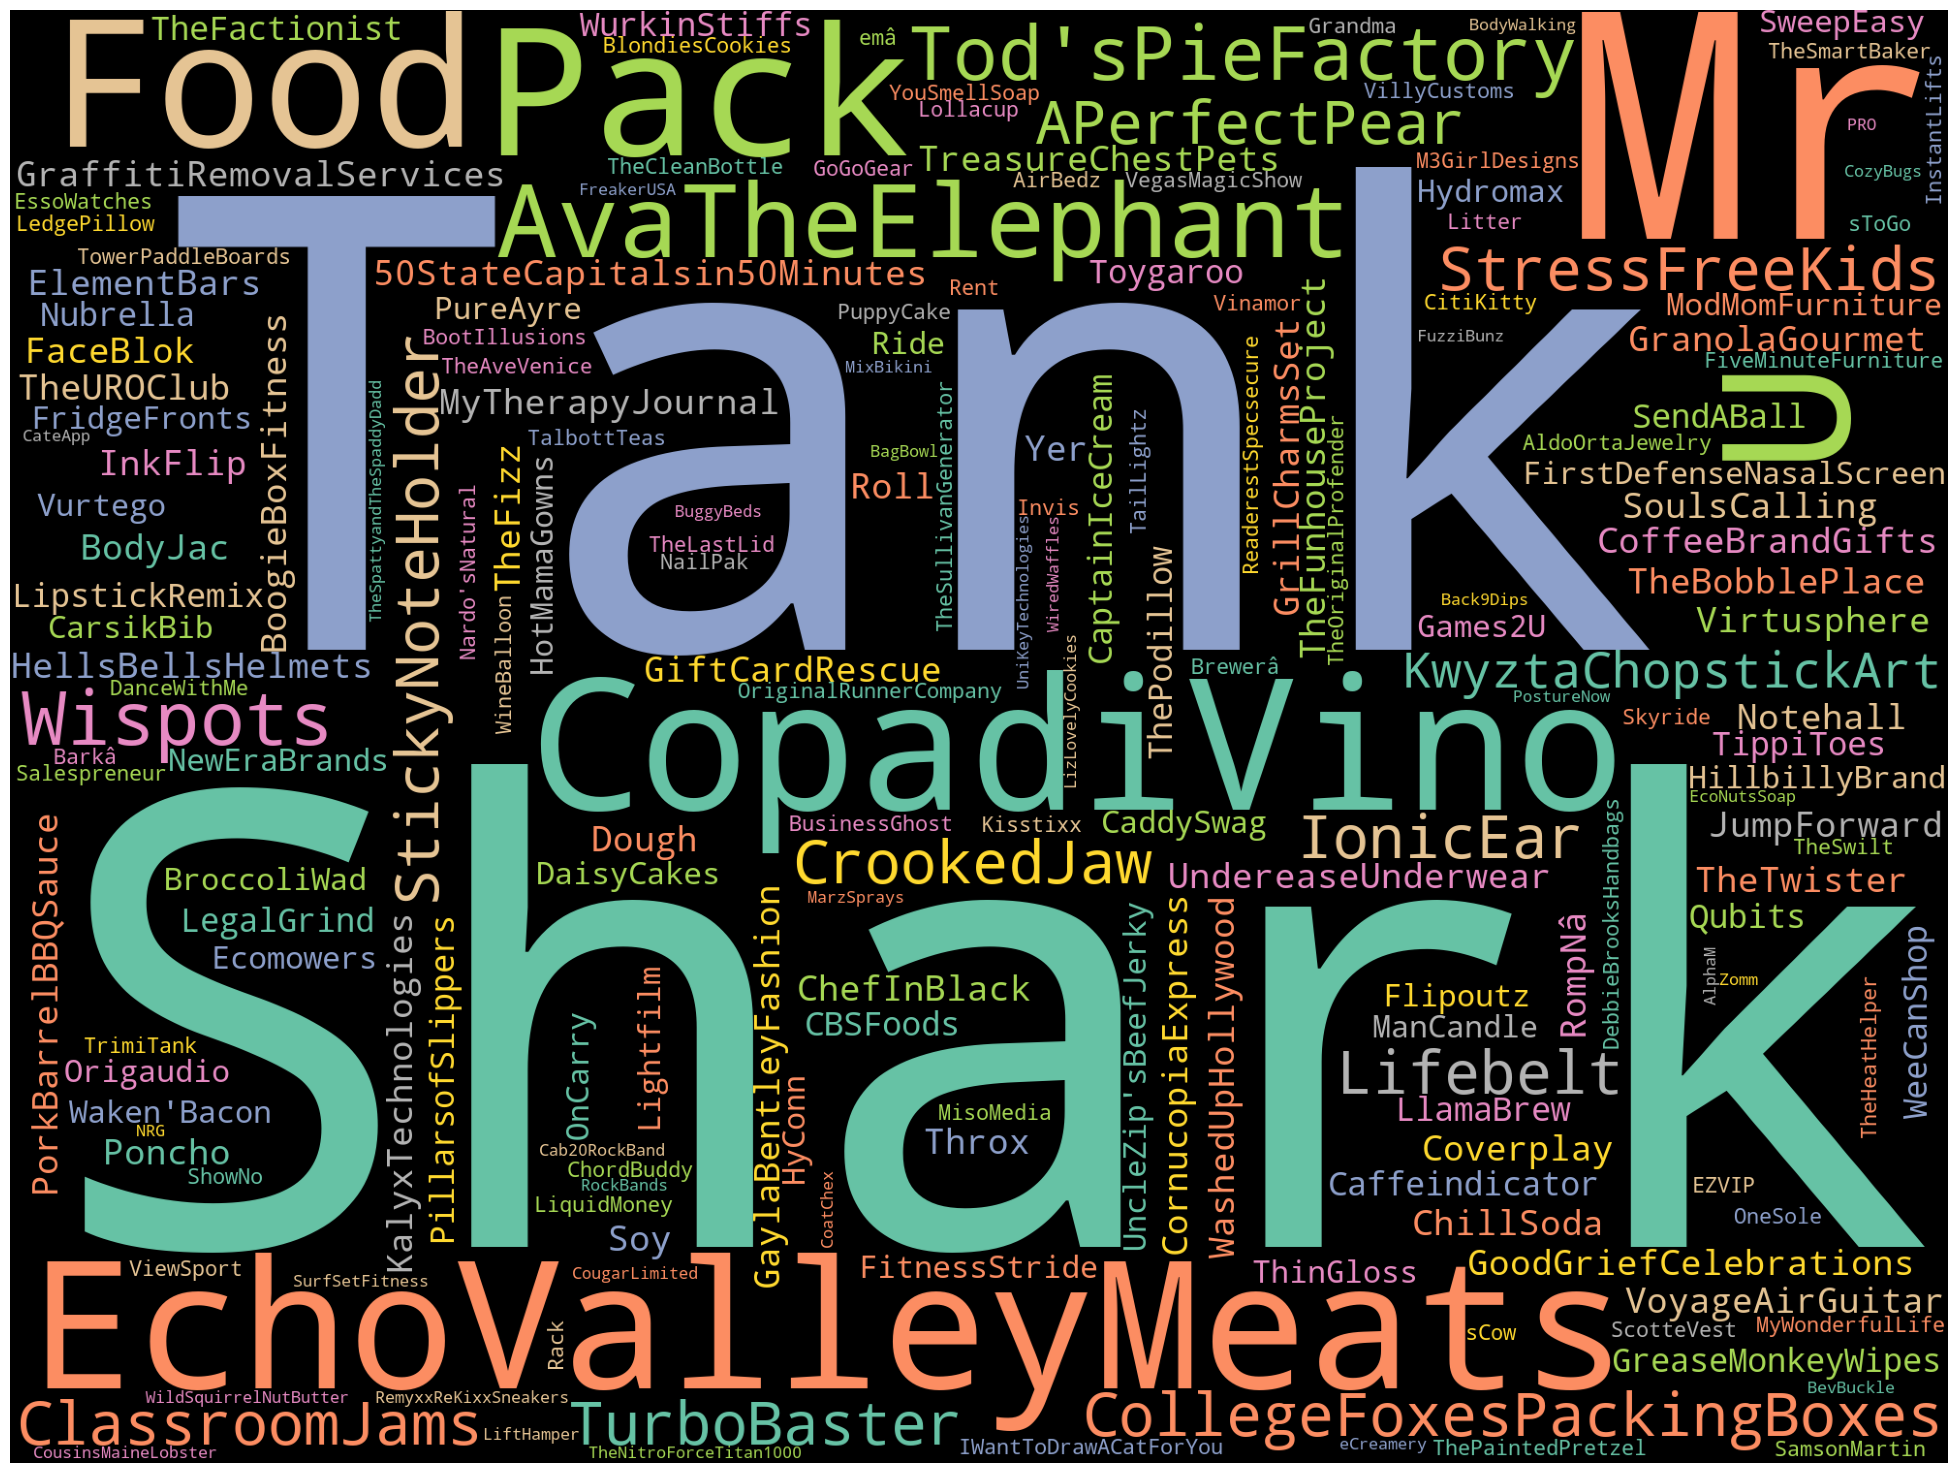

In [25]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

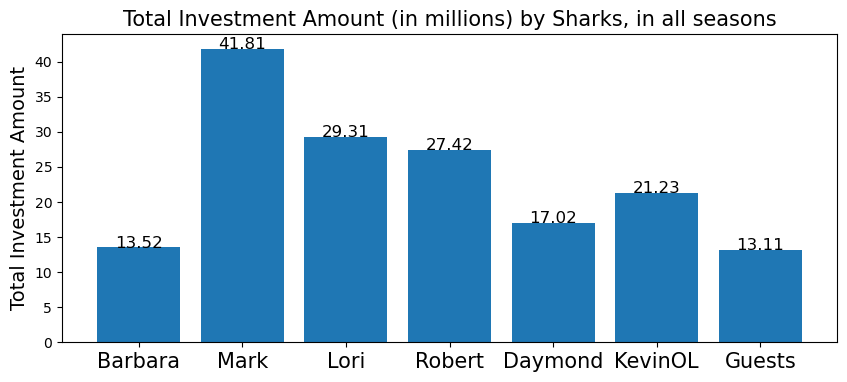

In [26]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

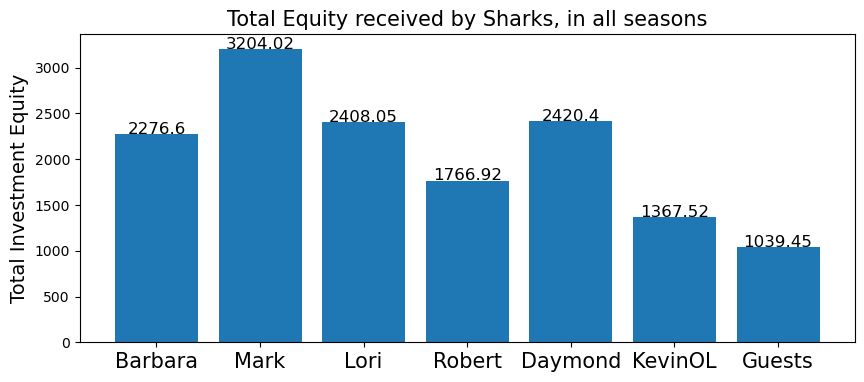

In [27]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Equity",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks, in all seasons", fontsize=15)
plt.show()

## Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    420
2.0    124
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     3%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


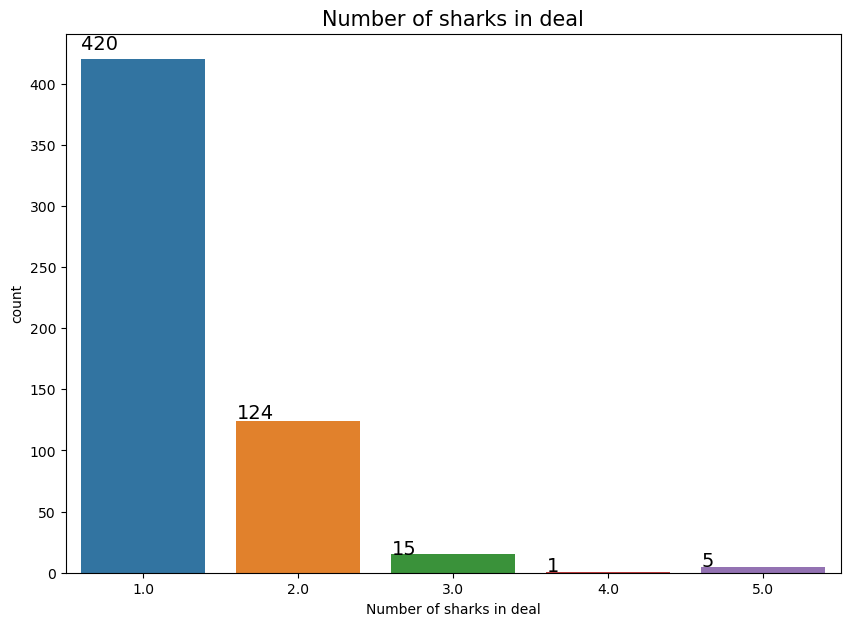

In [28]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal", fontsize=15)
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [29]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [30]:
shark_tank['Number of sharks in deal'].value_counts()

1.0    420
2.0    124
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64

In [31]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          88
Lori Greiner Investment Amount        78
Barbara Corcoran Investment Amount    61
dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 94
Investment amount by Barbara Corcoran $13,515,000
Equity received by Barbara Corcoran 2276.6 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet 

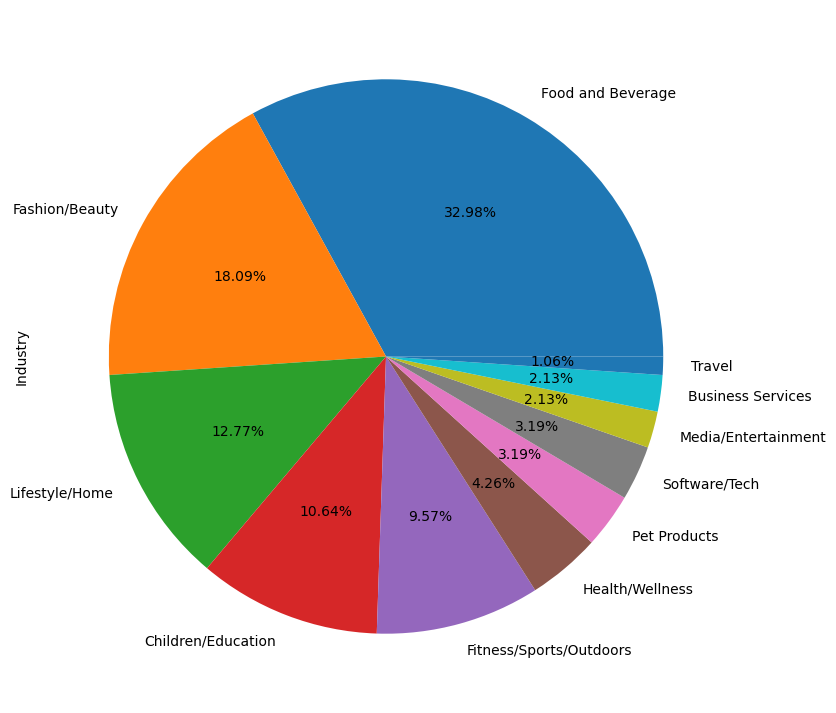

In [32]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-2:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.bar(tmpdf, x="Barbara Corcoran Investment Equity", y='Barbara Corcoran Investment Amount', color="Startup Name", title="<b>Total equity received by Barbara Corcoran (in %) for investment</b>", text=tmpdf['Barbara Corcoran Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 69
Investment amount by Mark Cuban $41,810,000
Equity received by Mark Cuban 3204.02 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Mark Cuban Investment Amount
              ClassroomJams      Children/Education                  5.000000e+04
                  TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                   Toygaroo      Children/Education                  1.000000e+05
    FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                     HyConn         Uncertain/Other                  1.250000e+06
                      EZVIP     Media/Entertainment                  7.500000e+04
             TheCleanBottle       Food and Beverage                  6.000000e+04
      IWantToDrawACatForYou           Software/Tech                  2.500000e+04
                WineBalloo

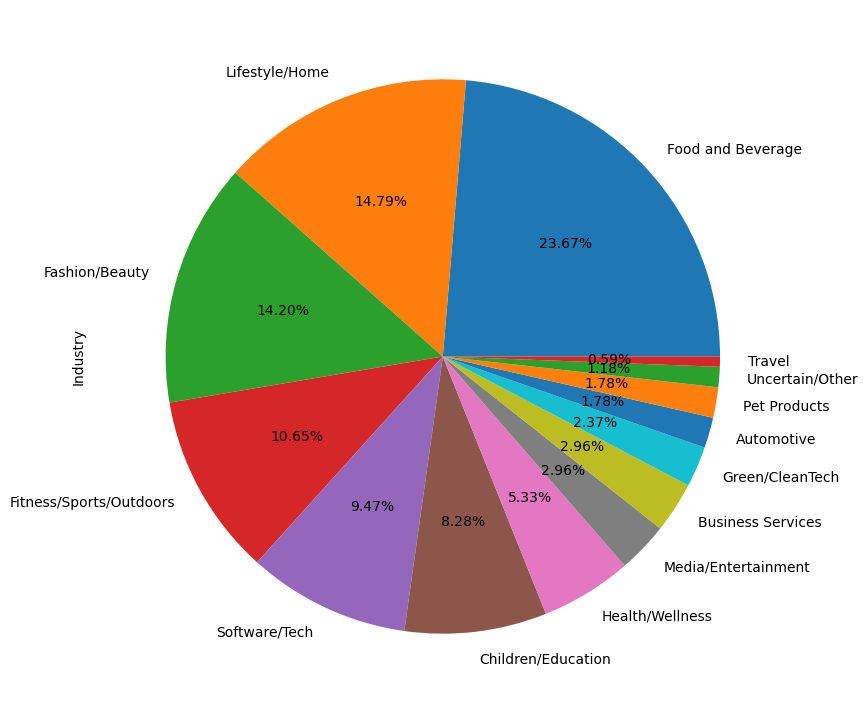

In [33]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-2:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.bar(tmpdf, x="Mark Cuban Investment Equity", y='Mark Cuban Investment Amount', color="Startup Name", title="<b>Total equity received by Mark Cuban (in %) for investment</b>", text=tmpdf['Mark Cuban Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 43
Investment amount by Lori Greiner $29,307,500
Equity received by Lori Greiner 2408.05 % in different companies

Company details:
---------------------------------------------------------------------------
              Startup Name                Industry  Lori Greiner Investment Amount
                    ShowNo          Fashion/Beauty                     75000.00000
             M3GirlDesigns          Fashion/Beauty                    100000.00000
       ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                   NailPak          Fashion/Beauty                     50000.00000
                   BagBowl          Lifestyle/Home                     40000.00000
                 Back9Dips       Food and Beverage                     75000.00000
                MarzSprays         Health/Wellness                    200000.00000
                ScrubDaddy          Lifestyle/Home                    200000.00000
           

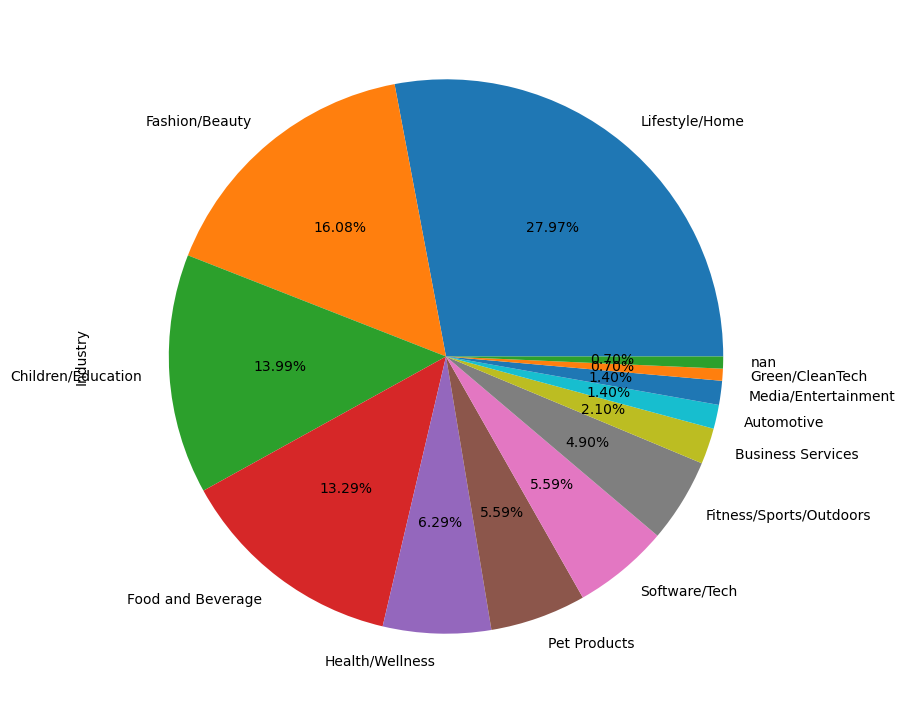

In [34]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-2:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.bar(tmpdf, x="Lori Greiner Investment Equity", y='Lori Greiner Investment Amount', color="Startup Name", title="<b>Total equity received by Lori Greiner (in %) for investment</b>", text=tmpdf['Lori Greiner Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 95
Investment amount by Robert Herjavec $27,419,832.67
Equity received by Robert Herjavec 1766.92 % in different companies

Company details:
---------------------------------------------------------------------------
                 Startup Name                Industry  Robert Herjavec Investment Amount
                 APerfectPear       Food and Beverage                       2.500000e+05
                ClassroomJams      Children/Education                       5.000000e+04
               GiftCardRescue           Software/Tech                       1.000000e+05
             MyTherapyJournal         Health/Wellness                       4.000000e+04
                Soy-Yer-Dough       Food and Beverage                       1.000000e+05
               GrillCharmsSet          Fashion/Beauty                       5.000000e+04
                  JumpForward      Children/Education                       3.000000e+05
            GreaseMonkeyWipes     

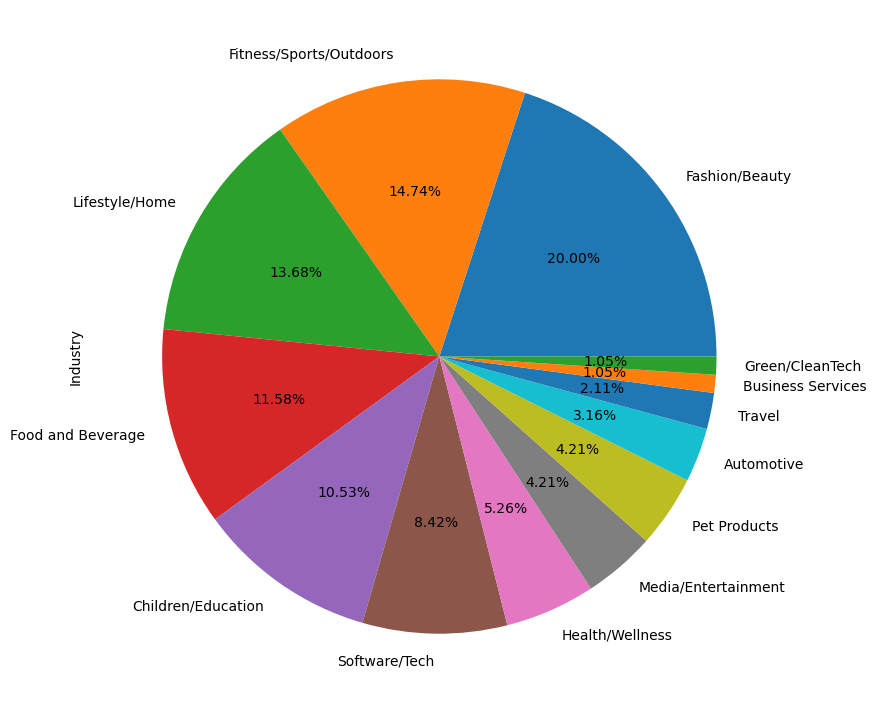

In [35]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-2:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.bar(tmpdf, x="Robert Herjavec Investment Equity", y='Robert Herjavec Investment Amount', color="Startup Name", title="<b>Total equity received by Robert Herjavec (in %) for investment</b>", text=tmpdf['Robert Herjavec Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John 91
Investment amount by Daymond John $17,021,500
Equity received by Daymond John 2420.4 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
   

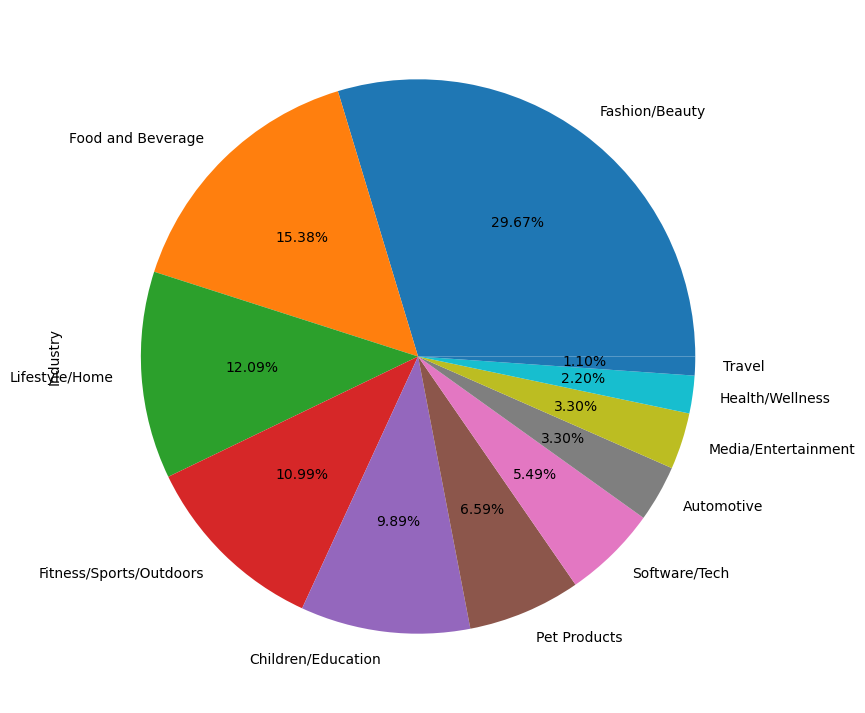

In [36]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-2:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.bar(tmpdf, x="Daymond John Investment Equity", y='Daymond John Investment Amount', color="Startup Name", title="<b>Total equity received by Daymond John (in %) for investment</b>", text=tmpdf['Daymond John Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 88
Investment amount by Kevin O Leary $21,232,500
Equity received by Kevin O Leary 1367.52 % in different companies

Company details:
---------------------------------------------------------------------------
            Startup Name                Industry  Kevin O Leary Investment Amount
            APerfectPear       Food and Beverage                     2.500000e+05
           ClassroomJams      Children/Education                     5.000000e+04
          GiftCardRescue           Software/Tech                     1.000000e+05
        MyTherapyJournal         Health/Wellness                     4.000000e+04
           Soy-Yer-Dough       Food and Beverage                     1.000000e+05
             JumpForward      Children/Education                     3.000000e+05
                Toygaroo      Children/Education                     1.000000e+05
            FridgeFronts          Lifestyle/Home                     5.000000e+04
             Talb

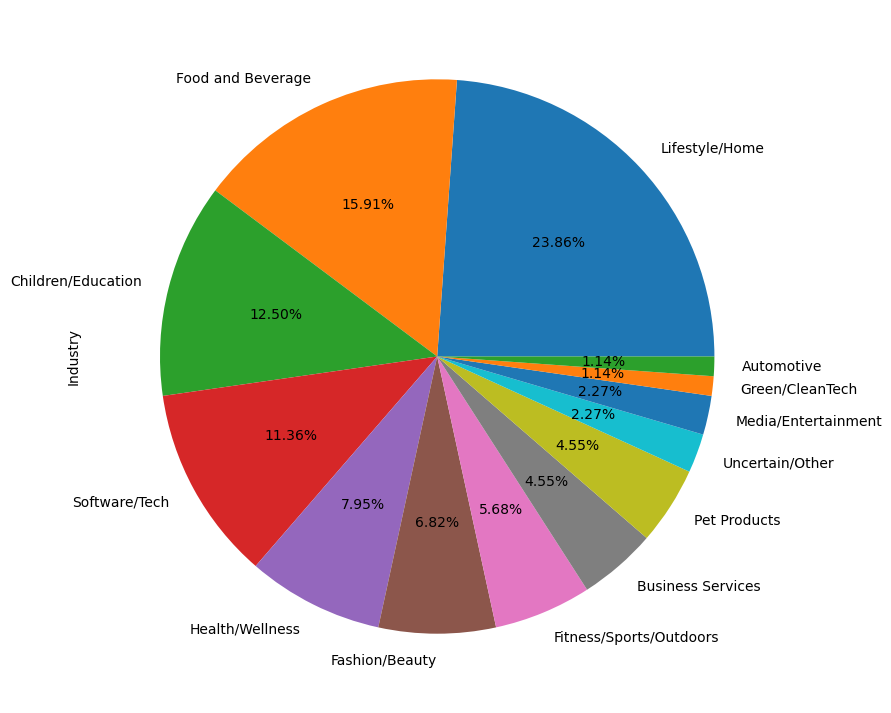

In [37]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-2:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.bar(tmpdf, x="Kevin O Leary Investment Equity", y='Kevin O Leary Investment Amount', color="Startup Name", title="<b>Total equity received by Kevin O Leary (in %) for investment</b>", text=tmpdf['Kevin O Leary Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 59
Investment amount by all Guests $13,108,333.33
Equity received by all Guests 1039.45 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Guest Investment Amount
            TurboBaster       Food and Beverage             3.500000e+04
            ElementBars Fitness/Sports/Outdoors             1.500000e+05
             TheUROClub Fitness/Sports/Outdoors             2.500000e+04
         Caffeindicator       Food and Beverage             2.000000e+05
               Hydromax Fitness/Sports/Outdoors             5.000000e+04
              CitiKitty            Pet Products             1.000000e+05
               TreeTPee         Green/CleanTech             1.500000e+05
     TheCookieDoughCafe       Food and Beverage             5.000000e+04
            KitchenSafe       Food and Beverage             5.000000e+04
             SharkWheel Fitness

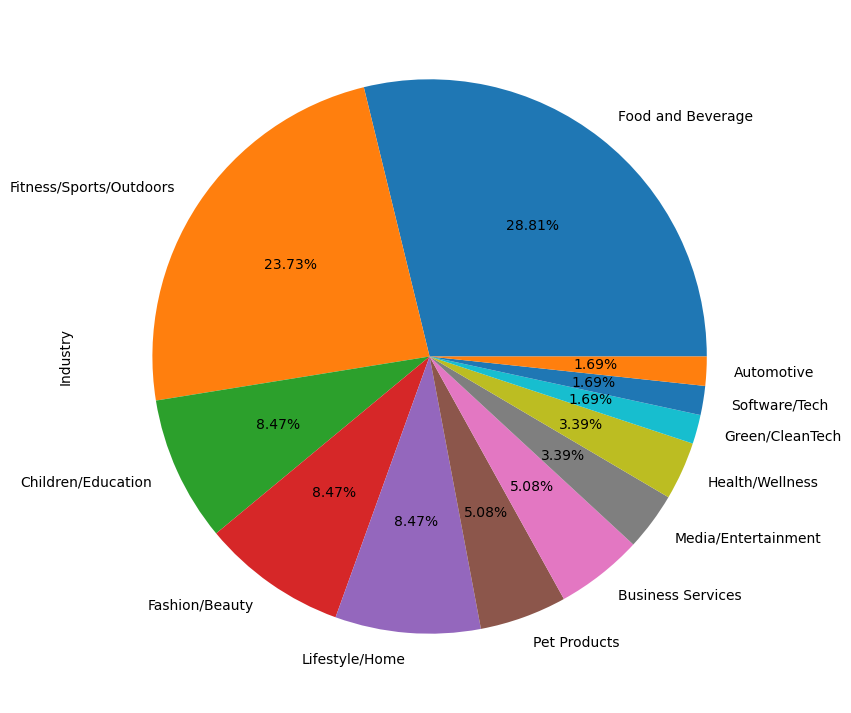

In [38]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.bar(tmpdf, x="Guest Investment Equity", y='Guest Investment Amount', color="Startup Name", title="<b>Total equity received by Guest (in %) for investment</b>", text=tmpdf['Guest Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

In [39]:
# US states of pitcher's
print(shark_tank['Pitchers State'].value_counts(), "\n")

CA           207
NY            70
TX            55
FL            47
IL            31
GA            23
UT            23
CO            23
MA            21
PA            20
NC            19
OR            19
OH            19
WA            15
NJ            13
AZ            13
VA            10
NV             9
MI             9
CT             7
DC             6
MN             6
MO             6
IN             5
TN             5
MD             5
WI             4
HI             4
VT             4
OK             4
SC             4
LA             3
RI             3
MS             3
KS             3
ID             3
AL             2
AR             2
KY             2
MT             1
Canada         1
New York       1
Tennessee      1
Louisiana      1
Virginia       1
DE             1
IA             1
AK             1
NE             1
NH             1
Oregon         1
Name: Pitchers State, dtype: int64 



In [40]:
# Top 20 cities
print(shark_tank['Pitchers City'].value_counts().nlargest(20), "\n")

Los Angeles       41
New York          30
San Francisco     25
Chicago           14
Austin            13
Atlanta           11
Portland          11
San Diego         10
Dallas             8
Denver             5
Houston            5
Tampa              5
Pittsburgh         5
Miami              5
Boston             5
Washington         4
Las Vegas          4
Salt Lake City     4
Provo              4
Philadelphia       4
Name: Pitchers City, dtype: int64 



In [41]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
15       GiftCardRescue             150000.0           200000.0
30        Soy-Yer-Dough             125000.0           300000.0
43          JumpForward             150000.0           600000.0
64         WurkinStiffs              85000.0           100000.0
65            TippiToes              30000.0           100000.0
..                  ...                  ...                ...
940         GeniusJuice             250000.0           500000.0
944         BalaBangles             400000.0           900000.0
987  YellowLeafHammocks             400000.0          1000000.0
991          TouchUpCup             150000.0           200000.0
996           Oogiebear             400000.0           600000.0

[99 rows x 3 columns]

In [42]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
0        AvaTheElephant                     15.0               55.0
1    Mr.Tod'sPieFactory                     10.0               50.0
5          APerfectPear                     15.0               50.0
6         ClassroomJams                     10.0              100.0
10          TurboBaster                     35.0              100.0
..                  ...                      ...                ...
991          TouchUpCup                     17.5               25.0
992         SparkCharge                      6.0               10.0
995                KENT                      5.0               15.0
996           Oogiebear                      5.0               10.0
997          Pizza Pack                     10.0               13.0

[472 rows x 3 columns]

In [43]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
51   GreaseMonkeyWipes             100000.0        100000.0
60              Qubits             176471.0        176471.0
78     Ride-OnCarry-On             200000.0        200000.0
85          DaisyCakes             200000.0        200000.0
92              HyConn            1250000.0       1250000.0
..                 ...                  ...             ...
908       BugBiteThing            1500000.0       1500000.0
915             EZCPak            2500000.0       2500000.0
933         SlumberPod            2000000.0       2000000.0
954   TheSpaceTraveler             300300.0        300300.0
961     CritterPricker             766667.0        766667.0

[86 rows x 3 columns]

In [44]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
30                   Soy-Yer-Dough             500000.0        588235.0
31                  GrillCharmsSet             200000.0        250000.0
77                  HillbillyBrand             200000.0        300000.0
84                       SweepEasy             160000.0        227273.0
104          IWantToDrawACatForYou              40000.0         75758.0
112                    WineBalloon             133333.0        400000.0
113                         ShowNo             200000.0        300000.0
149                  BootIllusions             333333.0       1250000.0
232                         Lose12             480000.0        500000.0
268                   Breathometer            2500000.0       3333333.0
276  HamboardsSkateboard/Surfboard             666667.0       1000000.0
285                   FiberFixTape             900000.0       2083333.0
323             TheCookieDoughCafe             250000.0        333333.0
324                     Cycloramic            1800000.0       3333333.0
336                     RevoLights            1500000.0       3000000.0
400               BeatBoxBeverages            2000000.0       3030303.0
436                          Lumio            3125000.0       3500000.0
444                    DrainStrain             733333.0       1100000.0
491                     SharkWheel            2000000.0       3000000.0
502                       Loliware            1500000.0       2400000.0
514                         XCraft            2500000.0       6000000.0
517                    Windcatcher            2500000.0       4000000.0
580                          Vengo           16000000.0      20000000.0
582                     Wondercide           10000000.0      16666667.0
654                  HandOutGloves             750000.0       1200000.0
671                      Tranquilo            1000000.0       1333333.0
675                        Toymail           10000000.0      12000000.0
721                      IceShaker             666667.0       1000000.0
744                      DNASimple             800000.0       1333333.0
775                     RounderBum            1500000.0       3000000.0
788                        Radiate             250000.0        400000.0
829                       Oatmeals            2500000.0      15000000.0
831                       PopItPal            2500000.0       5000000.0
845               MakeupJunkieBags            1333333.0       4000000.0
852                        SubSafe             384615.0        400000.0
912                       Myostorm            1500000.0       3000000.0
925       Mrs.Goldfarb'sUnrealDeli            1000000.0       1250000.0
935                  KreylEssence            4000000.0       8000000.0

In [45]:
# Episodes which got most TRP
print("Maximum Viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(9).sort_values("US Viewership",ascending=False).to_string(index=False))

## Incomplete data

Maximum Viewership in US: 8.43 

 Season Number  Episode Number     Startup Name  US Viewership
             6              20         LuminAid           8.43
             6              20          Scholly           8.43
             6              20         KeenHome           8.43
             6              20     TaalumaTotes           8.43
             5              23    VelocitySigns           6.85
             5              23        HappyFeet           6.85
             5              23 HoldYourHaunches           6.85
             5              23 LordNutLevington           6.85


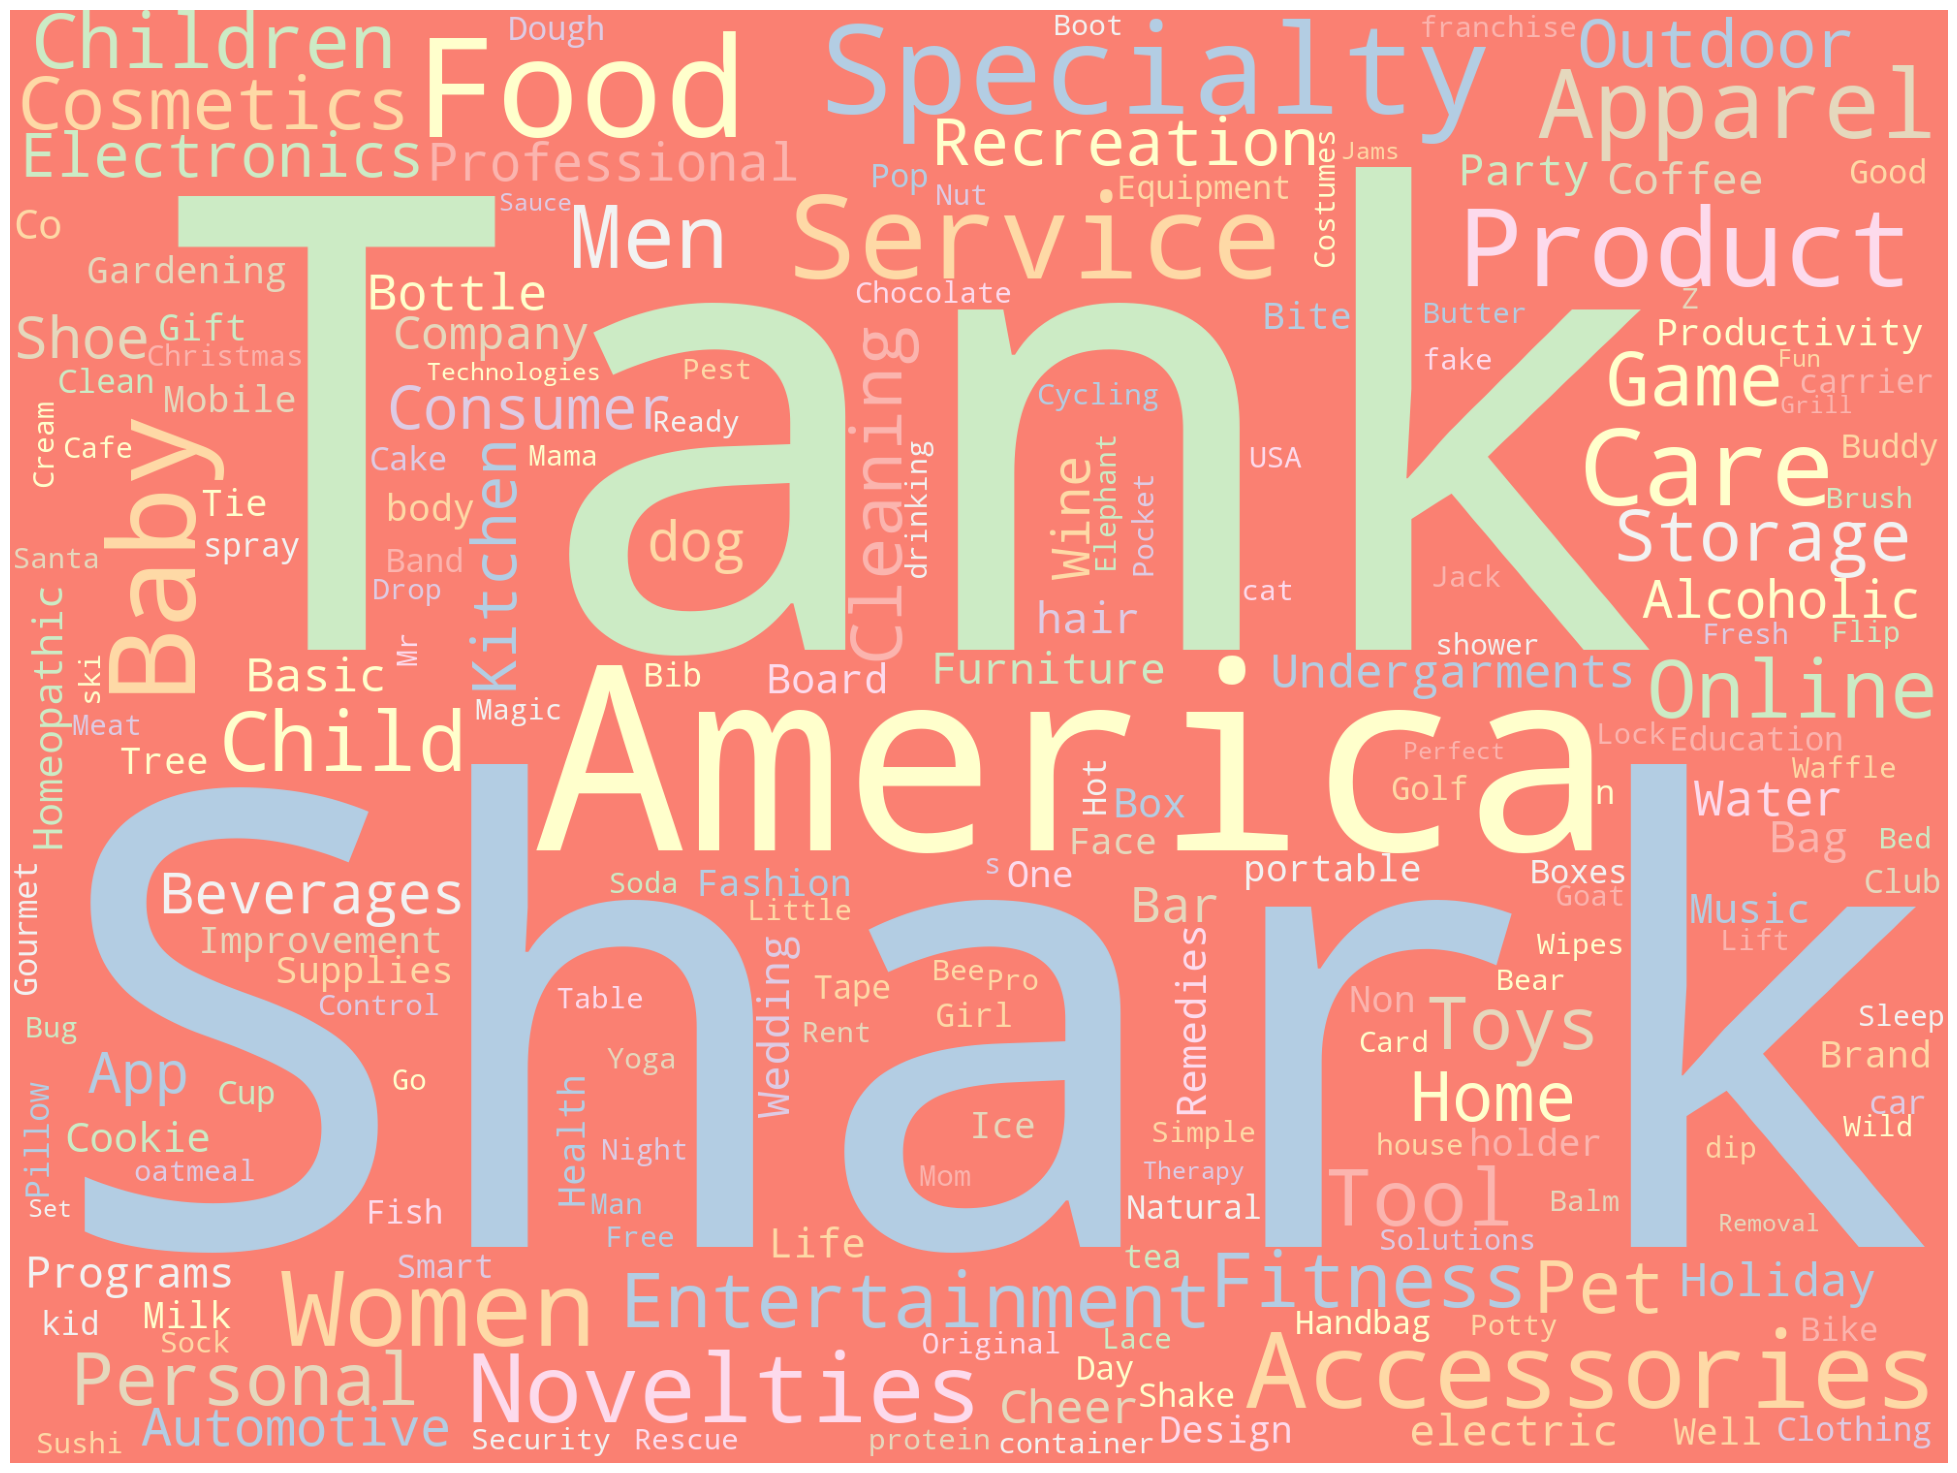

In [46]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [47]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [48]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.0
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.0
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [49]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
640              8    23-Sep-16  12-May-17               8           641   

    Original Air Date               Startup Name            Industry  \
640               NaN  Jack'sStands&Marketplaces  Children/Education   

                                  Business Description Pitchers Gender  \
640  Jack's Stands & Marketplaces - lemondate, iced...            Male   

    Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
640           NaN             CO                  Kid       Jack Bonneau   

                  Company Website  Multiple Entrepreneurs  US Viewership  \
640  https://www.jacksstands.com/                    <NA>            NaN   

     Original Ask Amount  Original Offered Equity  Valuation Requested  \
640              50000.0                     10.0             500000.0   

     Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
640         1                NaN                NaN             NaN   

     Number of sharks in deal  ...  Loan  Barbara Corcoran Investment Amount  \
640                       1.0  ...   1.0                                 NaN   

     Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
640                                 NaN                           NaN   

     Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
640                           NaN                             NaN   

     Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
640                             NaN                                NaN   

     Robert Herjavec Investment Equity  Daymond John Investment Amount  \
640                                NaN                             NaN   

     Daymond John Investment Equity  Kevin O Leary Investment Amount  \
640                             NaN                              NaN   

     Kevin O Leary Investment Equity  Guest Investment Amount  \
640                              NaN                      0.0   

     Guest Investment Equity  Barbara Corcoran Present  Mark Cuban Present  \
640                      0.0                       1.0                 1.0   

     Lori Greiner Present  Robert Herjavec Present  Daymond John Present  \
640                   1.0                      0.0                   0.0   

     Kevin O Leary Present  Kevin Harrington Present   Guest Name  \
640                    1.0                       1.0  Chris Sacca   

                                 Notes  Total Deal Amount in M  
640  2% interest loan from Chris Sacca                     NaN  

[1 rows x 53 columns]

In [50]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
207              4    14-Sep-12  17-May-13              13           208   
243              4    14-Sep-12  17-May-13              22           244   
311              5    20-Sep-13  16-May-14              13           312   
399              6    26-Sep-14  15-May-15               6           400   
640              8    23-Sep-16  12-May-17               8           641   
883             10    07-Oct-18  12-May-19              21           884   

    Original Air Date               Startup Name            Industry  \
207               NaN              CoffeeJoulies   Food and Beverage   
243               NaN         WickedGoodCupCakes   Food and Beverage   
311               NaN                 GrooveBook       Software/Tech   
399               NaN                  Honeyfund       Software/Tech   
640               NaN  Jack'sStands&Marketplaces  Children/Education   
883         28-Apr-19  TheBestPocketSqaureHolder      Fashion/Beauty   

                                  Business Description Pitchers Gender  \
207                         Coffee Joulies - Novelties            Male   
243             Wicked Good Cup Cakes - Specialty Food          Female   
311                     GrooveBook - Consumer Services      Mixed Team   
399                               Honeyfund - Weddings      Mixed Team   
640  Jack's Stands & Marketplaces - lemondate, iced...            Male   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   

    Pitchers City Pitchers State Pitchers Average Age  \
207    Pennington             NJ                  NaN   
243      Cohasset             MA                  NaN   
311   Los Angeles             CA                  NaN   
399    Sebastopol             CA                  NaN   
640           NaN             CO                  Kid   
883           NaN             MO                  NaN   

                       Entrepreneur Names  \
207        Dave Jackson and Dave Petrillo   
243  Tracey Noonan and Danielle Desroches   
311                                   NaN   
399                Sara and Josh Margulis   
640                          Jack Bonneau   
883                                   NaN   

                            Company Website  Multiple Entrepreneurs  \
207                  http://www.joulies.com                       1   
243      https://www.wickedgoodcupcakes.com                       1   
311                   http://groovebook.com                       0   
399               http://www.honeyfund.com/                       1   
640            https://www.jacksstands.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
207            NaN             150000.0                      5.0   
243            NaN              75000.0                     20.0   
311            NaN             150000.0                     20.0   
399            NaN             400000.0                     10.0   
640            NaN              50000.0                     10.0   
883           4.06             250000.0                     15.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
207            3000000.0         1           150000.0                NaN   
243             375000.0         1            75000.0                NaN   
311             750000.0         1           150000.0                NaN   
399            4000000.0         1           400000.0                NaN   
640             500000.0         1                NaN                NaN   
883            1666667.0         1           200000.0                NaN   

     Deal Valuation  Number of sharks in deal  ...  Loan  \
207             NaN                       4.0  ...   NaN   
243             NaN                       1.0  ...   NaN   
311             NaN                       2.

In [51]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
207              4    14-Sep-12  17-May-13              13           208   
243              4    14-Sep-12  17-May-13              22           244   
311              5    20-Sep-13  16-May-14              13           312   
312              5    20-Sep-13  16-May-14              13           313   
399              6    26-Sep-14  15-May-15               6           400   
640              8    23-Sep-16  12-May-17               8           641   
883             10    07-Oct-18  12-May-19              21           884   

    Original Air Date               Startup Name            Industry  \
207               NaN              CoffeeJoulies   Food and Beverage   
243               NaN         WickedGoodCupCakes   Food and Beverage   
311               NaN                 GrooveBook       Software/Tech   
312               NaN             TheWallDoctoRX      Lifestyle/Home   
399               NaN                  Honeyfund       Software/Tech   
640               NaN  Jack'sStands&Marketplaces  Children/Education   
883         28-Apr-19  TheBestPocketSqaureHolder      Fashion/Beauty   

                                  Business Description Pitchers Gender  \
207                         Coffee Joulies - Novelties            Male   
243             Wicked Good Cup Cakes - Specialty Food          Female   
311                     GrooveBook - Consumer Services      Mixed Team   
312                The Wall DoctoRX - Home Improvement            Male   
399                               Honeyfund - Weddings      Mixed Team   
640  Jack's Stands & Marketplaces - lemondate, iced...            Male   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   

    Pitchers City Pitchers State Pitchers Average Age  \
207    Pennington             NJ                  NaN   
243      Cohasset             MA                  NaN   
311   Los Angeles             CA                  NaN   
312    Wilmington             DE                  NaN   
399    Sebastopol             CA                  NaN   
640           NaN             CO                  Kid   
883           NaN             MO                  NaN   

                       Entrepreneur Names  \
207        Dave Jackson and Dave Petrillo   
243  Tracey Noonan and Danielle Desroches   
311                                   NaN   
312                                   NaN   
399                Sara and Josh Margulis   
640                          Jack Bonneau   
883                                   NaN   

                            Company Website  Multiple Entrepreneurs  \
207                  http://www.joulies.com                       1   
243      https://www.wickedgoodcupcakes.com                       1   
311                   http://groovebook.com                       0   
312               http://www.walldoctor.com                       0   
399               http://www.honeyfund.com/                       1   
640            https://www.jacksstands.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
207            NaN             150000.0                      5.0   
243            NaN              75000.0                     20.0   
311            NaN             150000.0                     20.0   
312            NaN             150000.0                     10.0   
399            NaN             400000.0                     10.0   
640            NaN              50000.0                     10.0   
883           4.06             250000.0                     15.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
207            3000000.0         1           150000.0                NaN   
243             375000.0         1            75000.0                NaN   
311             750000.0         1           150000.0             

In [52]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   

    Original Air Date               Startup Name           Industry  \
72          01-Apr-11            ModMomFurniture     Lifestyle/Home   
834         09-Dec-18               Mother/Poppi  Food and Beverage   
841         13-Jan-19                   Pristine    Health/Wellness   
844         20-Jan-19                 KittyKasas       Pet Products   
883         28-Apr-19  TheBestPocketSqaureHolder     Fashion/Beauty   

                                  Business Description Pitchers Gender  \
72                       Mod Mom Furniture - Furniture          Female   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   

    Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
72      Flagstaff             AZ                  NaN  Kiersten Hathcock   
834           NaN             TX               Middle                NaN   
841           NaN             TX                  NaN                NaN   
844           NaN            NaN                  NaN                NaN   
883           NaN             MO                  NaN                NaN   

                            Company Website  Multiple Entrepreneurs  \
72          http://www.modmomfurniture.com/                       0   
834             https://www.drinkpoppi.com/                    <NA>   
841         https://www.pristinesprays.com/                       1   
844                 https://kittykasas.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
72            4.87              90000.0                     25.0   
834           3.40             400000.0                     10.0   
841           4.31              50000.0                     20.0   
844           2.82             200000.0                     20.0   
883           4.06             250000.0                     15.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
72              360000.0         1            90000.0               33.0   
834            4000000.0         1           400000.0               25.0   
841             250000.0         1            50000.0               25.0   
844            1000000.0         1           200000.0               30.0   
883            1666667.0         1           200000.0                NaN   

     Deal Valuation  Number of sharks in deal  ...  Loan  \
72         272727.0                       NaN  ...   NaN   
834       1600000.0                       NaN  ...   NaN   
841        200000.0                       NaN  ...   NaN   
844        666667.0                       NaN  ...   NaN   
883             NaN                       NaN  ...   NaN   

     Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
72                                  NaN                                 NaN   
834                                 NaN                                 NaN   
841                                 NaN                                 NaN   
844                                 NaN                                 NaN   
883                                 NaN                                 NaN   

     Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
72                     

In [53]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
10               1    09-Aug-09  05-Feb-10               3            11   
26               1    09-Aug-09  05-Feb-10               6            27   
55               1    09-Aug-09  05-Feb-10              13            56   
72               2    20-Mar-11  13-May-11               3            73   
98               2    20-Mar-11  13-May-11               9            99   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   

    Original Air Date               Startup Name                 Industry  \
10                NaN                TurboBaster        Food and Beverage   
26                NaN                ElementBars  Fitness/Sports/Outdoors   
55                NaN             Caffeindicator        Food and Beverage   
72          01-Apr-11            ModMomFurniture           Lifestyle/Home   
98                NaN                  CitiKitty             Pet Products   
834         09-Dec-18               Mother/Poppi        Food and Beverage   
841         13-Jan-19                   Pristine          Health/Wellness   
844         20-Jan-19                 KittyKasas             Pet Products   
883         28-Apr-19  TheBestPocketSqaureHolder           Fashion/Beauty   

                                  Business Description Pitchers Gender  \
10                         TurboBaster - Kitchen Tools          Female   
26                       Element Bars - Specialty Food            Male   
55                          Caffeindicator - Novelties            Male   
72                       Mod Mom Furniture - Furniture          Female   
98                            CitiKitty - Pet Products          Female   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   

     Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
10   San Francisco             CA                  NaN        Marian Cruz   
26         Chicago             IL                  NaN    Jonathan Miller   
55         Mt. Joy             PA               Middle  Michael Schiavone   
72       Flagstaff             AZ                  NaN  Kiersten Hathcock   
98     Morrisville             PA                  NaN    Rebecca Rescate   
834            NaN             TX               Middle                NaN   
841            NaN             TX                  NaN                NaN   
844            NaN            NaN                  NaN                NaN   
883            NaN             MO                  NaN                NaN   

                            Company Website  Multiple Entrepreneurs  \
10                                      NaN                       0   
26              http://www.elementbars.com/                       0   
55                http://www.llamabrew.com/                       0   
72          http://www.modmomfurniture.com/                       0   
98                http://www.citikitty.com/                       0   
834             https://www.drinkpoppi.com/                    <NA>   
841         https://www.pristinesprays.com/                       1   
844                 https://kittykasas.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
10             NaN              35000.0                     35.0   
26             NaN             150000.0                     15.0   
55             NaN             200000.0       

In [54]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
10               1    09-Aug-09  05-Feb-10               3            11   
26               1    09-Aug-09  05-Feb-10               6            27   
55               1    09-Aug-09  05-Feb-10              13            56   
72               2    20-Mar-11  13-May-11               3            73   
98               2    20-Mar-11  13-May-11               9            99   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   

    Original Air Date               Startup Name                 Industry  \
10                NaN                TurboBaster        Food and Beverage   
26                NaN                ElementBars  Fitness/Sports/Outdoors   
55                NaN             Caffeindicator        Food and Beverage   
72          01-Apr-11            ModMomFurniture           Lifestyle/Home   
98                NaN                  CitiKitty             Pet Products   
834         09-Dec-18               Mother/Poppi        Food and Beverage   
841         13-Jan-19                   Pristine          Health/Wellness   
844         20-Jan-19                 KittyKasas             Pet Products   
883         28-Apr-19  TheBestPocketSqaureHolder           Fashion/Beauty   

                                  Business Description Pitchers Gender  \
10                         TurboBaster - Kitchen Tools          Female   
26                       Element Bars - Specialty Food            Male   
55                          Caffeindicator - Novelties            Male   
72                       Mod Mom Furniture - Furniture          Female   
98                            CitiKitty - Pet Products          Female   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   

     Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
10   San Francisco             CA                  NaN        Marian Cruz   
26         Chicago             IL                  NaN    Jonathan Miller   
55         Mt. Joy             PA               Middle  Michael Schiavone   
72       Flagstaff             AZ                  NaN  Kiersten Hathcock   
98     Morrisville             PA                  NaN    Rebecca Rescate   
834            NaN             TX               Middle                NaN   
841            NaN             TX                  NaN                NaN   
844            NaN            NaN                  NaN                NaN   
883            NaN             MO                  NaN                NaN   

                            Company Website  Multiple Entrepreneurs  \
10                                      NaN                       0   
26              http://www.elementbars.com/                       0   
55                http://www.llamabrew.com/                       0   
72          http://www.modmomfurniture.com/                       0   
98                http://www.citikitty.com/                       0   
834             https://www.drinkpoppi.com/                    <NA>   
841         https://www.pristinesprays.com/                       1   
844                 https://kittykasas.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
10             NaN              35000.0                     35.0   
26             NaN             150000.0                     15.0   
55             NaN             200000.0       

In [55]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   
903             11    29-Sep-19  15-May-20               3           904   

    Original Air Date               Startup Name           Industry  \
72          01-Apr-11            ModMomFurniture     Lifestyle/Home   
834         09-Dec-18               Mother/Poppi  Food and Beverage   
841         13-Jan-19                   Pristine    Health/Wellness   
844         20-Jan-19                 KittyKasas       Pet Products   
883         28-Apr-19  TheBestPocketSqaureHolder     Fashion/Beauty   
903               NaN                   Eterneva  Business Services   

                                  Business Description Pitchers Gender  \
72                       Mod Mom Furniture - Furniture          Female   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   
903                                        Eterneva -       Mixed Team   

    Pitchers City Pitchers State Pitchers Average Age Entrepreneur Names  \
72      Flagstaff             AZ                  NaN  Kiersten Hathcock   
834           NaN             TX               Middle                NaN   
841           NaN             TX                  NaN                NaN   
844           NaN            NaN                  NaN                NaN   
883           NaN             MO                  NaN                NaN   
903           NaN            NaN                  NaN                NaN   

                            Company Website  Multiple Entrepreneurs  \
72          http://www.modmomfurniture.com/                       0   
834             https://www.drinkpoppi.com/                    <NA>   
841         https://www.pristinesprays.com/                       1   
844                 https://kittykasas.com/                    <NA>   
883  https://www.bestwardrobesolutions.com/                    <NA>   
903                                     NaN                    <NA>   

     US Viewership  Original Ask Amount  Original Offered Equity  \
72            4.87              90000.0                     25.0   
834           3.40             400000.0                     10.0   
841           4.31              50000.0                     20.0   
844           2.82             200000.0                     20.0   
883           4.06             250000.0                     15.0   
903            NaN             600000.0                      5.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
72              360000.0         1            90000.0               33.0   
834            4000000.0         1           400000.0               25.0   
841             250000.0         1            50000.0               25.0   
844            1000000.0         1           200000.0               30.0   
883            1666667.0         1           200000.0                NaN   
903           12000000.0         1           600000.0                6.0   

     Deal Valuation  Number of sharks in deal  ...  Loan  \
72         272727.0                       NaN  ...   NaN   
834       1600000.0                       NaN  ...   NaN   
841        200000.0                       NaN  ...   NaN   
844        666667.0                       NaN  ...   NaN   
883             NaN                       NaN  ...   NaN   
903      10000000.0                       1.0  ...   N

In [56]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
903             11    29-Sep-19  15-May-20               3           904   

    Original Air Date     Startup Name           Industry  \
72          01-Apr-11  ModMomFurniture     Lifestyle/Home   
834         09-Dec-18     Mother/Poppi  Food and Beverage   
841         13-Jan-19         Pristine    Health/Wellness   
844         20-Jan-19       KittyKasas       Pet Products   
903               NaN         Eterneva  Business Services   

                   Business Description Pitchers Gender Pitchers City  \
72        Mod Mom Furniture - Furniture          Female     Flagstaff   
834  Mother - apple cider vinegar drink      Mixed Team           NaN   
841         Pristine - cleansing sprays      Mixed Team           NaN   
844            Kitty Kasas - cat houses      Mixed Team           NaN   
903                         Eterneva -       Mixed Team           NaN   

    Pitchers State Pitchers Average Age Entrepreneur Names  \
72              AZ                  NaN  Kiersten Hathcock   
834             TX               Middle                NaN   
841             TX                  NaN                NaN   
844            NaN                  NaN                NaN   
903            NaN                  NaN                NaN   

                     Company Website  Multiple Entrepreneurs  US Viewership  \
72   http://www.modmomfurniture.com/                       0           4.87   
834      https://www.drinkpoppi.com/                    <NA>           3.40   
841  https://www.pristinesprays.com/                       1           4.31   
844          https://kittykasas.com/                    <NA>           2.82   
903                              NaN                    <NA>            NaN   

     Original Ask Amount  Original Offered Equity  Valuation Requested  \
72               90000.0                     25.0             360000.0   
834             400000.0                     10.0            4000000.0   
841              50000.0                     20.0             250000.0   
844             200000.0                     20.0            1000000.0   
903             600000.0                      5.0           12000000.0   

     Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
72          1            90000.0               33.0        272727.0   
834         1           400000.0               25.0       1600000.0   
841         1            50000.0               25.0        200000.0   
844         1           200000.0               30.0        666667.0   
903         1           600000.0                6.0      10000000.0   

     Number of sharks in deal  ...  Loan  Barbara Corcoran Investment Amount  \
72                        NaN  ...   NaN                                 NaN   
834                       NaN  ...   NaN                                 NaN   
841                       NaN  ...   NaN                                 NaN   
844                       NaN  ...   NaN                                 NaN   
903                       1.0  ...   NaN                                 NaN   

     Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
72                                  NaN                           NaN   
834                                 NaN                           NaN   
841                                 NaN                           NaN   
844                                 NaN                           NaN   
903                                 NaN                           NaN   

     Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
72                            NaN

In [57]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
42               1    09-Aug-09  05-Feb-10              10            43   
896             11    29-Sep-19  15-May-20               1           897   
910             11    29-Sep-19  15-May-20               4           911   
913             11    29-Sep-19  15-May-20               5           914   
923             11    29-Sep-19  15-May-20               8           924   
944             11    29-Sep-19  15-May-20              13           945   
949             11    29-Sep-19  15-May-20              14           950   
958             11    29-Sep-19  15-May-20              16           959   
987             11    29-Sep-19  15-May-20              24           988   

    Original Air Date        Startup Name                 Industry  \
42                NaN          TheUROClub  Fitness/Sports/Outdoors   
896               NaN         TaDah!Foods        Food and Beverage   
910               NaN            KnifeAid        Business Services   
913               NaN         TailgateNGo  Fitness/Sports/Outdoors   
923               NaN             Gallant             Pet Products   
944               NaN         BalaBangles  Fitness/Sports/Outdoors   
949               NaN         PairEyewear          Health/Wellness   
958               NaN        SafetyNailer           Lifestyle/Home   
987         15-May-20  YellowLeafHammocks  Fitness/Sports/Outdoors   

            Business Description Pitchers Gender Pitchers City Pitchers State  \
42   The UROClub - Golf Products            Male         Miami             FL   
896              TaDah! Foods -             Male           NaN            NaN   
910                 Knife Aid -             Male           NaN            NaN   
913             Tailgate N Go -       Mixed Team           NaN            NaN   
923                   Gallant -             Male           NaN            NaN   
944              Bala Bangles -       Mixed Team           NaN            NaN   
949              Pair Eyewear -       Mixed Team           NaN            NaN   
958             Safety Nailer -             Male           NaN            NaN   
987      Yellow Leaf Hammocks -       Mixed Team           NaN            NaN   

    Pitchers Average Age Entrepreneur Names          Company Website  \
42                   NaN   Dr. Floyd Seskin  http://www.uroclub.com/   
896                  NaN                NaN                      NaN   
910                  NaN                NaN                      NaN   
913                  NaN                NaN                      NaN   
923                  NaN                NaN                      NaN   
944                  NaN                NaN                      NaN   
949                  NaN                NaN                      NaN   
958                  NaN                NaN                      NaN   
987                  NaN                NaN                      NaN   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
42                        0            NaN              25000.0   
896                    <NA>            NaN             300000.0   
910                    <NA>            NaN             400000.0   
913                    <NA>            NaN             250000.0   
923                    <NA>            NaN             500000.0   
944                    <NA>            NaN             400000.0   
949                    <NA>            NaN             400000.0   
958                    <NA>            NaN             100000.0   
987                    <NA>           4.55             400000.0   

     Original Offered Equity  Valuation Requested  Got Deal  \
42                      51.0              49020.0         1   
896                     10.0            3000000.0         1   
910                     15.0            2666667.0         1   
913                     10.0            2500000.0         1   
923                      